In [9]:
import numpy as np


class Perceptron(object):
    """
    класс ификатор на основе персептрона
    Параметры
    eta : float
        Темп обучения (между О.О и 1 .0)
    n_iter : int
        Проходы по тренировочному набору данных (число эпох)
    Атрибуты
    -------
    w : 1-мерный массив
        Весовые коэффициенты после подгонки.
    errors_ : список
        Число случаев ошибочной классификации в каждой эпохе
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """
        Выполнить подгонку модели под тренировочные данные
        
        Параметры
        --------
        Х : (массивоподобный) , форма = [n_samples , n_features]
            тренировочные векторы , где
            n_samples - число образцов и
            n_features - число признаков 
        у : (массивоподобный) , форма = [n_samples]
            Целевые значения
        Возвращает
        --------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        # Рассчитать чистый вход
        # np.dot(a, b) == sum([i*j, for i, j in zip( a, Ь)]
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        # Вернуть метку класса после единичного скачка
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


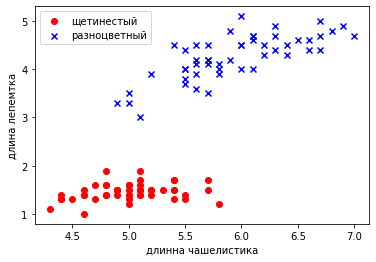

In [16]:
import matplotlib.pyplot as plt
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], 
            color = 'red', marker = 'o', label = 'щетинестый')
plt.scatter(X[50:100, 0], X[50:100, 1], 
            color = 'blue', marker = 'x', label = 'разноцветный')
plt.xlabel('длинна чашелистика')
plt.ylabel('длина лепемтка')
plt.legend(loc='upper left')
plt.show()

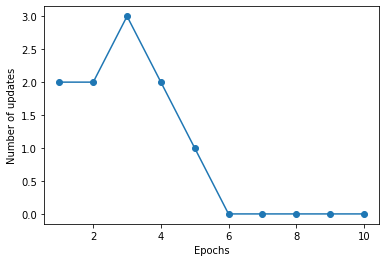

In [17]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # настройка генератора маркеров и палитры
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[: len(np.unique(y))])
    
    # вывод поверхности решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # показать образцы классов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


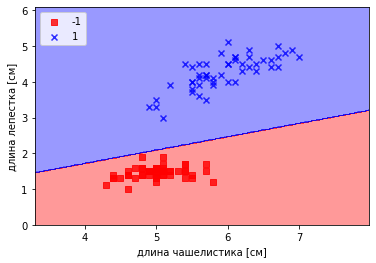

In [23]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()